<a href="https://colab.research.google.com/github/MoralesTorres/ML_Notebooks/blob/master/Copia_1_de_TextgGenerationLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. IMPORTING DEPENDENCIES


In [1]:
!pip install -q gradio

     |████████████████████████████████| 1.1MB 6.4MB/s 
     |████████████████████████████████| 215kB 25.8MB/s 
     |████████████████████████████████| 962kB 25.7MB/s 
     |████████████████████████████████| 71kB 10.8MB/s 
     |████████████████████████████████| 3.2MB 53.2MB/s 


In [2]:
%tensorflow_version 2.x
import tensorflow as tf 
import string 
import requests 
import math
import re
import time
from google.colab import drive

In [3]:
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
with open("/content/drive/MyDrive/basic.txt",
          mode='r',
          encoding='utf-8') as f:
    advanced = f.read()

In [5]:
data = advanced.split('\n')
data[0]


'On weekdays except Friday (this is, from Monday to Thursday) I get up early – at half past seven. I have a white coffee and biscuits for breakfast and I go to work. I work from eight to five. I always have lunch at the office. I usually have a sandwich and a juice or a piece of fruit for lunch.'

In [6]:
data[3]

"On Friday I work from nine to one. Then I have lunch and at four I go to my course. I'm taking a course on the Internet. It's interesting. I finish at six. Then I go out for a drink with my friends."

In [7]:
len(data)

10

In [8]:
data = " ".join(data)
data[:1000]

"On weekdays except Friday (this is, from Monday to Thursday) I get up early – at half past seven. I have a white coffee and biscuits for breakfast and I go to work. I work from eight to five. I always have lunch at the office. I usually have a sandwich and a juice or a piece of fruit for lunch.  In the afternoon, I go to my English class. That's from five to six. After that, I go shopping for food and things for the house. Then I often listen to my audio CD. And I listen and repeat! Sometimes I do my homework. At about half past eight I cook dinner for my family and me. We usually have dinner at nine thirty. Then we watch TV or read. I often go to bed at about half past eleven. On Friday I work from nine to one. Then I have lunch and at four I go to my course. I'm taking a course on the Internet. It's interesting. I finish at six. Then I go out for a drink with my friends. At the weekend my day is different. On Saturday, in the morning, oh well, on Saturday morning my family and I do 

In [9]:
def clean_text(doc):
  tokens = doc.split()
  table = str.maketrans('' , '', string.punctuation)
  tokens = [w.translate(table) for w in tokens]
  tokens = [word for word in tokens if word.isalpha()]
  tokens = [word.lower() for word in tokens]
  return tokens 

In [10]:
tokens = clean_text(data)
print(tokens[:50])

['on', 'weekdays', 'except', 'friday', 'this', 'is', 'from', 'monday', 'to', 'thursday', 'i', 'get', 'up', 'early', 'at', 'half', 'past', 'seven', 'i', 'have', 'a', 'white', 'coffee', 'and', 'biscuits', 'for', 'breakfast', 'and', 'i', 'go', 'to', 'work', 'i', 'work', 'from', 'eight', 'to', 'five', 'i', 'always', 'have', 'lunch', 'at', 'the', 'office', 'i', 'usually', 'have', 'a', 'sandwich']


In [11]:
len(tokens)

292

In [12]:
len(set(tokens))

124

In [13]:

from random import randint

def generate_sequence(length, n_unique):
  return [randint(0, n_unique-1) for _ in range(length)]

sequence = generate_sequence(10, 50)
print(sequence)

[5, 43, 25, 4, 43, 43, 37, 2, 20, 41]


In [14]:
def one_hot_encode(sequence, n_unique):
	encoding = list()
	for value in sequence:
		vector = [0 for _ in range(n_unique)]
		vector[value] = 1
		encoding.append(vector)
	return array(encoding)

In [15]:


def one_hot_decode(encoded_seq):
	return [argmax(vector) for vector in encoded_seq]


In [17]:

from random import randint
from numpy import array
from numpy import argmax

# generate a sequence of random integers
def generate_sequence(length, n_unique):
	return [randint(0, n_unique-1) for _ in range(length)]

# one hot encode sequence
def one_hot_encode(sequence, n_unique):
	encoding = list()
	for value in sequence:
		vector = [0 for _ in range(n_unique)]
		vector[value] = 1
		encoding.append(vector)
	return array(encoding)

# decode a one hot encoded string
def one_hot_decode(encoded_seq):
	return [argmax(vector) for vector in encoded_seq]

# generate random sequence
sequence = generate_sequence(5, 50)
print(sequence)
# one hot encode
encoded = one_hot_encode(sequence, 50)
print(encoded)
# decode
decoded = one_hot_decode(encoded)
print(decoded)



[42, 23, 13, 35, 9]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[42, 23, 13, 35, 9]


In [18]:
# prepare data for the LSTM
def get_pair(n_in, n_out, n_unique):
	# generate random sequence
	sequence_in = generate_sequence(n_in, n_unique)
	sequence_out = sequence_in[:n_out] + [0 for _ in range(n_in-n_out)]
	# one hot encode
	X = one_hot_encode(sequence_in, n_unique)
	y = one_hot_encode(sequence_out, n_unique)
	# reshape as 3D
	X = X.reshape((1, X.shape[0], X.shape[1]))
	y = y.reshape((1, y.shape[0], y.shape[1]))
	return X,y

In [19]:
from random import randint
from numpy import array
from numpy import argmax
 
# generate a sequence of random integers
def generate_sequence(length, n_unique):
	return [randint(0, n_unique-1) for _ in range(length)]
 
# one hot encode sequence
def one_hot_encode(sequence, n_unique):
	encoding = list()
	for value in sequence:
		vector = [0 for _ in range(n_unique)]
		vector[value] = 1
		encoding.append(vector)
	return array(encoding)
 
# decode a one hot encoded string
def one_hot_decode(encoded_seq):
	return [argmax(vector) for vector in encoded_seq]
 
# prepare data for the LSTM
def get_pair(n_in, n_out, n_unique):
	# generate random sequence
	sequence_in = generate_sequence(n_in, n_unique)
	sequence_out = sequence_in[:n_out] + [0 for _ in range(n_in-n_out)]
	# one hot encode
	X = one_hot_encode(sequence_in, n_unique)
	y = one_hot_encode(sequence_out, n_unique)
	# reshape as 3D
	X = X.reshape((1, X.shape[0], X.shape[1]))
	y = y.reshape((1, y.shape[0], y.shape[1]))
	return X,y
 
# generate random sequence
X, y = get_pair(5, 2, 50)
print(X.shape, y.shape)
print('X=%s, y=%s' % (one_hot_decode(X[0]), one_hot_decode(y[0])))

(1, 5, 50) (1, 5, 50)
X=[33, 12, 42, 47, 40], y=[33, 12, 0, 0, 0]


In [20]:
length = 10 + 1
lines = []

for i in range(length, len(tokens)):
  seq = tokens[i-length:i]
  line = ' '.join(seq)
  lines.append(line)
  if i > 5000:
    break

print(len(lines))

281


In [21]:
lines[2]

'except friday this is from monday to thursday i get up'

## Construction of our LSTM model / Training X and Y


In [22]:
tokens[30]

'to'

In [23]:
import numpy as np 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences 

In [24]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines)
sequences = tokenizer.texts_to_sequences(lines)



In [25]:
sequences = np.array(sequences)
X, y = sequences[:, :-1], sequences[:,-1]
X[0]


array([  9, 123, 121,  49, 120,  47,  16, 119,   3, 117])

In [26]:
X[1]

array([123, 121,  49, 120,  47,  16, 119,   3, 117,   1])

In [27]:
vocab_size = len(tokenizer.word_index) + 1

In [28]:
y[1]

51

In [29]:
y = to_categorical(y, num_classes=vocab_size )
X.shape[1]

10

In [30]:
seq_length = X.shape[1]
seq_length


10

## LSTM MODEL

In [31]:
pip install attention

In [32]:
pip install keras-self-attention

  Created wheel for keras-self-attention: filename=keras_self_attention-0.49.0-cp37-none-any.whl size=19468 sha256=5e22d76296c1ff125b4af979e52e6e4b438e9c0a1ef51d6ad76b8521a8010761
  Stored in directory: /root/.cache/pip/wheels/6f/9d/c5/26693a5092d9313daeae94db04818fc0a2b7a48ea381989f34
Successfully built keras-self-attention


In [33]:
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=seq_length))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(100, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 50)            6200      
_________________________________________________________________
lstm (LSTM)                  (None, 10, 100)           60400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
dense_1 (Dense)              (None, 124)               12524     
Total params: 169,624
Trainable params: 169,624
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [36]:
model.fit(X, y, batch_size = 50, epochs = 250)

Epoch 1/250
6/6 [==============================] - 33s 7ms/step - loss: 4.8184 - accuracy: 0.0288
Epoch 2/250
6/6 [==============================] - 0s 6ms/step - loss: 4.8004 - accuracy: 0.0933
Epoch 3/250
6/6 [==============================] - 0s 6ms/step - loss: 4.7413 - accuracy: 0.0801
Epoch 4/250
6/6 [==============================] - 0s 6ms/step - loss: 4.5254 - accuracy: 0.0831
Epoch 5/250
6/6 [==============================] - 0s 6ms/step - loss: 4.4233 - accuracy: 0.0788
Epoch 6/250
6/6 [==============================] - 0s 7ms/step - loss: 4.3626 - accuracy: 0.0878
Epoch 7/250
6/6 [==============================] - 0s 6ms/step - loss: 4.2841 - accuracy: 0.0879
Epoch 8/250
6/6 [==============================] - 0s 6ms/step - loss: 4.2240 - accuracy: 0.0825
Epoch 9/250
6/6 [==============================] - 0s 6ms/step - loss: 4.3219 - accuracy: 0.0766
Epoch 10/250
6/6 [==============================] - 0s 6ms/step - loss: 4.2173 - accuracy: 0.0940
Epoch 11/250
6/6 [==========

In [37]:
seed_text=lines[150]
seed_text

'have lunch and at four i go to my course im'

In [38]:

import sys, os, re, csv, codecs, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from sklearn.model_selection import train_test_split

In [39]:

batch_size = 64
epochs = 2
model.fit(X,y, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/2
4/4 [==============================] - 1s 304ms/step - loss: 0.0489 - accuracy: 0.9921 - val_loss: 0.0444 - val_accuracy: 1.0000
Epoch 2/2
4/4 [==============================] - 0s 20ms/step - loss: 0.0482 - accuracy: 0.9921 - val_loss: 0.0462 - val_accuracy: 1.0000


Text(0.5, 1.0, 'Training and validation loss')

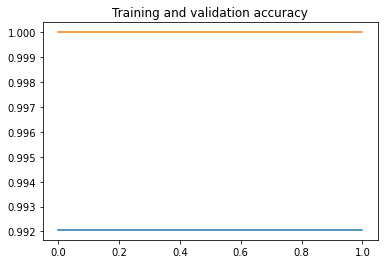

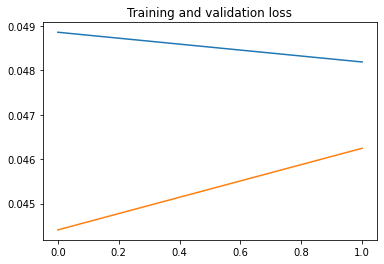

In [40]:

history = model.history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
# Get number of epochs\n",
epochs = range(len(acc))

# Plot training and validation accuracy per epoch\n",
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.figure()

# Plot training and validation loss per epoch\n",
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [42]:
model.evaluate(X, y, verbose=1)

9/9 [==============================] - 0s 4ms/step - loss: 0.0470 - accuracy: 0.9929


[0.04695957154035568, 0.9928825497627258]

In [43]:
seed_text=lines[0]
seed_text

'on weekdays except friday this is from monday to thursday i'

In [44]:

def generate_text_seq(model, tokenizer, text_seq_length, seed_text, n_words):
  text = []

  for _ in range(n_words):
    encoded = tokenizer.texts_to_sequences([seed_text])[0]
    encoded = pad_sequences([encoded], maxlen = text_seq_length, truncating='pre')

    y_predict = model.predict_classes(encoded)

    predicted_word = ''
    for word, index in tokenizer.word_index.items():
      if index == y_predict:
        predicted_word = word
        break
    seed_text = seed_text + ' ' + predicted_word
    text.append(predicted_word)
  return ' '.join(text)



In [48]:

generate_text_seq(model, tokenizer, seq_length, seed_text, 15+5 )

 
 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'get up early at half past seven i have a white coffee and biscuits for breakfast and i go to'

In [49]:

import gradio as gr

def prediction_text(seed_text,n_words):    
 text_seq_length = 3
 # seed_text =             "this is the" ...
 output = generate_text_seq(model, tokenizer, text_seq_length, seed_text, int(n_words)) 
 return output


iface = gr.Interface(fn=prediction_text, inputs= ["text", "text"], outputs="text")
iface.launch()




Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://41229.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7861/',
 'https://41229.gradio.app')